In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('income.csv')

In [13]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [16]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [18]:
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

Turn gender into a binary feature instead of one hot encoding. 
other features with more than two variables can be one hot encoded

In [19]:
pd.get_dummies(df.occupation)

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
48839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# add prefix to distinguish the colummn with ? from other features with the same ?
# then join the one hot encoded variables with the rest of the data
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)

In [21]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [22]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [24]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

there are so many columns. drop the less important columns. 
use visualization to decide which columns to drop

<AxesSubplot:>

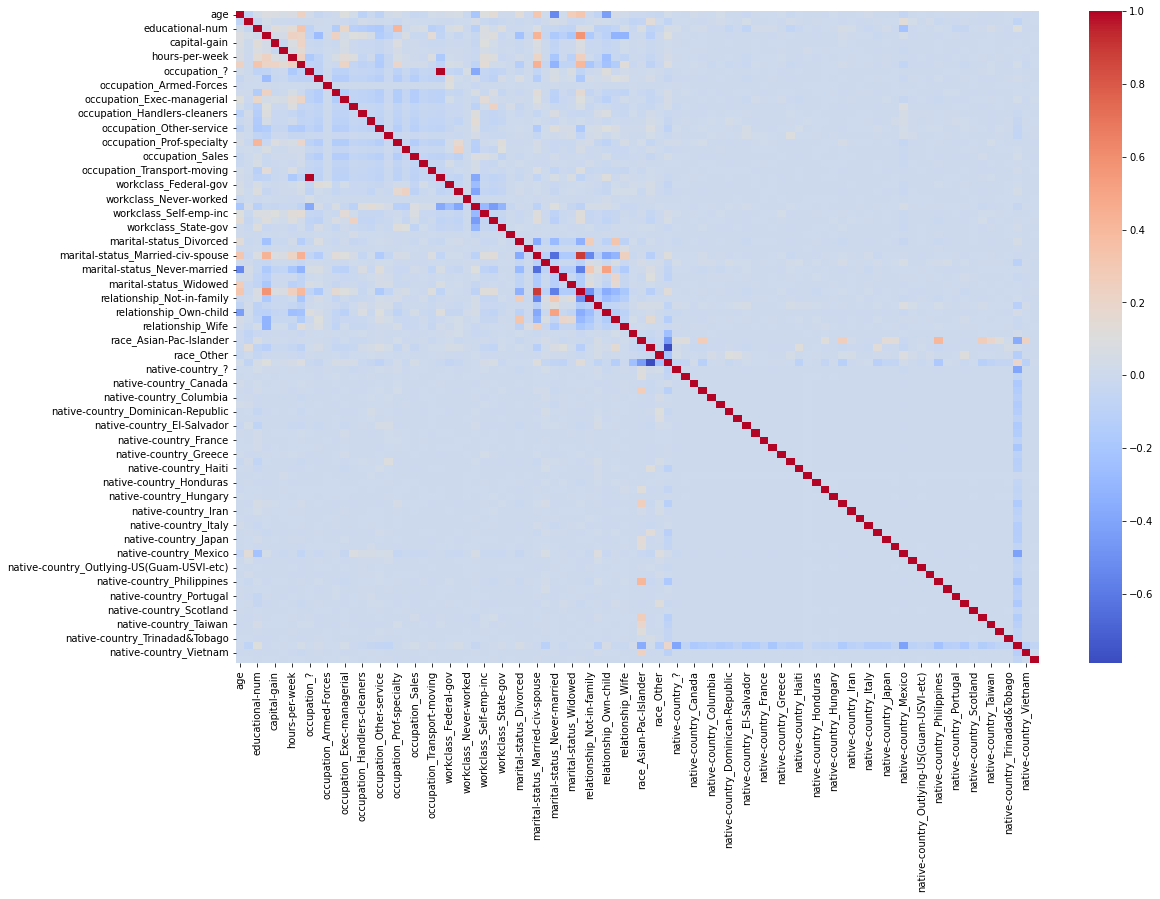

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [26]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


filter out the features that are not strongly correlated

In [27]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8*len(df.columns)) #drop 80% of the columns - those not strongly correlated
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [28]:
df_dropped 

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

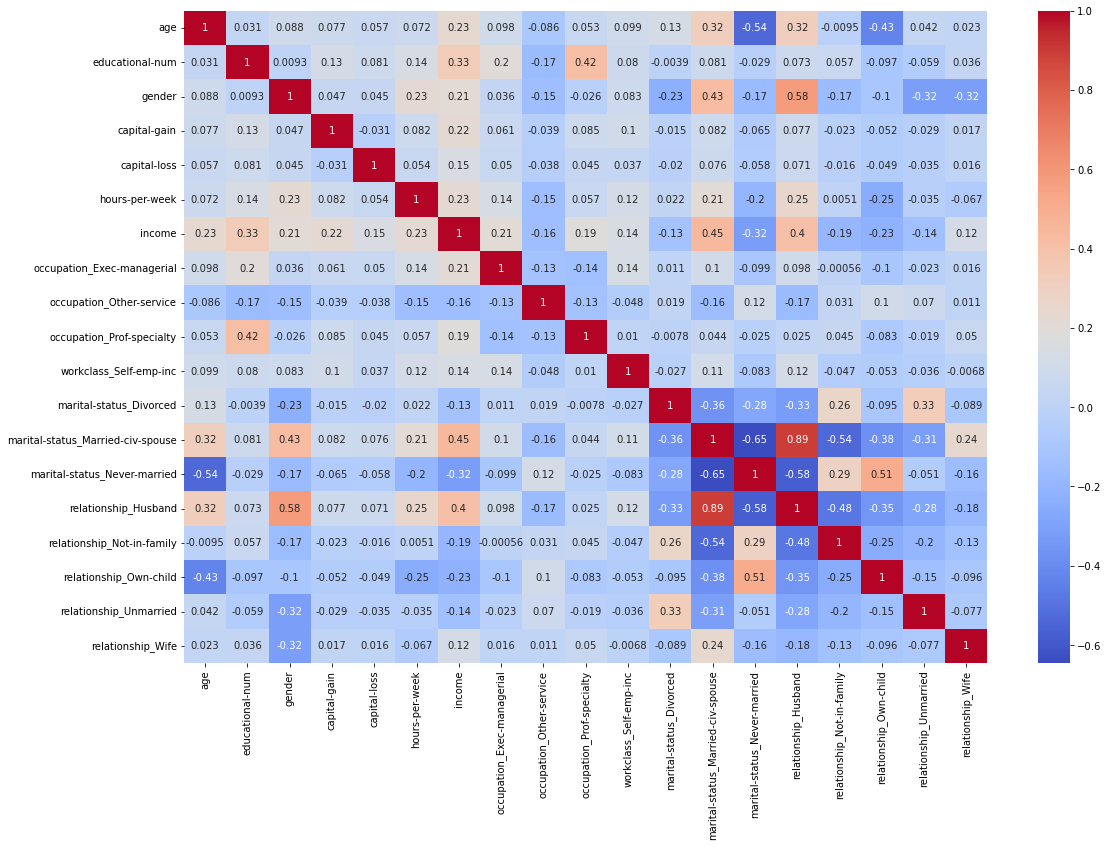

In [29]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

A couple of features are strongly correlated with higher income: marital status(married), husband, education, hrs per week worked all seem to correlate +vely with income. 
However, correlation is not the same as importance. the next steps will be to figure out most important features

Random forest classifier will be used for this exercise. 
Random forest classifier is used because there are a lot of binary features in the dataset and not a ton of numerical features. Decision trees are better for binary (yes/no) type classification; random forest is an ensemble of decision trees. 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_dropped, test_size=0.2)
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
41195,58,10,0,0,0,40,0,0,1,0,0,1,0,0,0,0,0,1,0
19486,31,4,1,0,0,40,0,0,0,0,0,0,0,1,0,0,0,1,0
27024,28,9,1,0,0,60,0,0,0,0,0,0,0,1,0,0,1,0,0
36662,26,13,1,0,0,45,1,0,1,0,0,0,1,0,1,0,0,0,0
24305,22,9,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38727,45,7,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
32642,24,13,0,0,0,40,0,0,0,0,0,0,0,1,0,1,0,0,0
39278,19,10,1,0,0,23,0,0,0,0,0,0,0,1,0,0,1,0,0
42819,28,9,0,0,0,38,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
40824,23,13,0,0,0,40,0,0,0,1,0,0,0,1,0,1,0,0,0
6050,21,10,0,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
35440,40,6,0,0,0,40,0,0,0,0,0,1,0,0,0,1,0,0,0
27484,46,14,0,0,0,50,1,1,0,0,1,0,1,0,0,0,0,0,1
9701,48,15,1,99999,0,50,1,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,65,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
10828,19,10,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0
20602,32,9,1,0,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0
2419,54,14,1,0,0,40,0,1,0,0,0,0,0,0,0,1,0,0,0


In [32]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [33]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [34]:
forest.score(test_X, test_y)

0.8527996724332071

In [35]:
forest.feature_importances_

array([0.23353664, 0.14035141, 0.01203744, 0.14340469, 0.04669712,
       0.13410381, 0.02292341, 0.00739657, 0.02092197, 0.0081078 ,
       0.0065783 , 0.1035974 , 0.02170397, 0.07024442, 0.00629085,
       0.00463878, 0.00402617, 0.01343925])

In [37]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_Exec-managerial',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'workclass_Self-emp-inc', 'marital-status_Divorced',
       'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife'], dtype=object)

<BarContainer object of 18 artists>

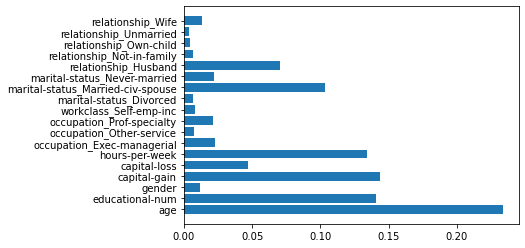

In [38]:
plt.barh(forest.feature_names_in_, forest.feature_importances_)

In [40]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_)) # combine into key value pairs
importances

{'age': 0.23353663799530147,
 'educational-num': 0.14035141441661683,
 'gender': 0.01203743809148338,
 'capital-gain': 0.14340469078411178,
 'capital-loss': 0.046697124851819094,
 'hours-per-week': 0.13410380976810152,
 'occupation_Exec-managerial': 0.02292340781435396,
 'occupation_Other-service': 0.007396569689356372,
 'occupation_Prof-specialty': 0.020921965211140273,
 'workclass_Self-emp-inc': 0.008107801408847674,
 'marital-status_Divorced': 0.006578299924646944,
 'marital-status_Married-civ-spouse': 0.10359739754705044,
 'marital-status_Never-married': 0.021703972963510818,
 'relationship_Husband': 0.07024442044240788,
 'relationship_Not-in-family': 0.006290847368391389,
 'relationship_Own-child': 0.004638779172504419,
 'relationship_Unmarried': 0.004026173159845266,
 'relationship_Wife': 0.01343924939051052}

In [41]:
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)} #sort

In [42]:
#Hyper parameter tuning using Grid search

from sklearn.model_selection import GridSearchCV

#start by defining the parameters like no of estimators, max depth etc.
param_grid = {
    'n_estimators': [50,100,250],
    'max_depth': [5,10,30, None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)


In [43]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.849 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.853 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.856 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.854 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [44]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10)

In [45]:
forest = grid_search.best_estimator_

In [46]:
forest.score(test_X, test_y)

0.8656976149042891

In [48]:
importances

{'age': 0.23353663799530147,
 'capital-gain': 0.14340469078411178,
 'educational-num': 0.14035141441661683,
 'hours-per-week': 0.13410380976810152,
 'marital-status_Married-civ-spouse': 0.10359739754705044,
 'relationship_Husband': 0.07024442044240788,
 'capital-loss': 0.046697124851819094,
 'occupation_Exec-managerial': 0.02292340781435396,
 'marital-status_Never-married': 0.021703972963510818,
 'occupation_Prof-specialty': 0.020921965211140273,
 'relationship_Wife': 0.01343924939051052,
 'gender': 0.01203743809148338,
 'workclass_Self-emp-inc': 0.008107801408847674,
 'occupation_Other-service': 0.007396569689356372,
 'marital-status_Divorced': 0.006578299924646944,
 'relationship_Not-in-family': 0.006290847368391389,
 'relationship_Own-child': 0.004638779172504419,
 'relationship_Unmarried': 0.004026173159845266}